In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 결측치 시각화를 위한 라이브러리
import missingno

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

### 데이터 소개
- 이 데이터는 타이타닉호에 탑승한 승객의 정보와 사망/생존 정보가 담긴 데이터이다.
- 전체 승객데이터의 일부를 떼어내어 예측할 데이터로 제공되고 있다.
- PassengerId : 승객 번호. 1부터 1씩 증가시킨 값. 의미 없음
- Survived : 생존 여부, 결과 데이터, (0 = 사망, 1 = 생존)
- Pclass : 객실 등급(1 = 1등석, 2 = 2등석, 3 = 3등석)
- Name : 탑승객 이름
- Sex : 성별 (male = 남성, female = 여성)
- Age : 나이
- SibSp : 동승한 형제 자매, 배우자 수 총합
- Parch : 함께 탑승한 부모, 자녀의 수 총합, 나이가 어릴데 동승자가 0인 경우 유모가 있는 경우이다
- Ticket : 티켓 번호
- Fare : 요금
- Cabin : 객실 번호
- Embarked : 선착장. C - Cherbourg, Q - Queenstown, S - Southampton

### 데이터를 불러온다
- train 데이터만을 가지고 분석을 진행한다.

In [2]:
train_df = pd.read_csv('data/train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### EDA

In [3]:
# 데이터 프레임 정보 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 결측치 확인
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

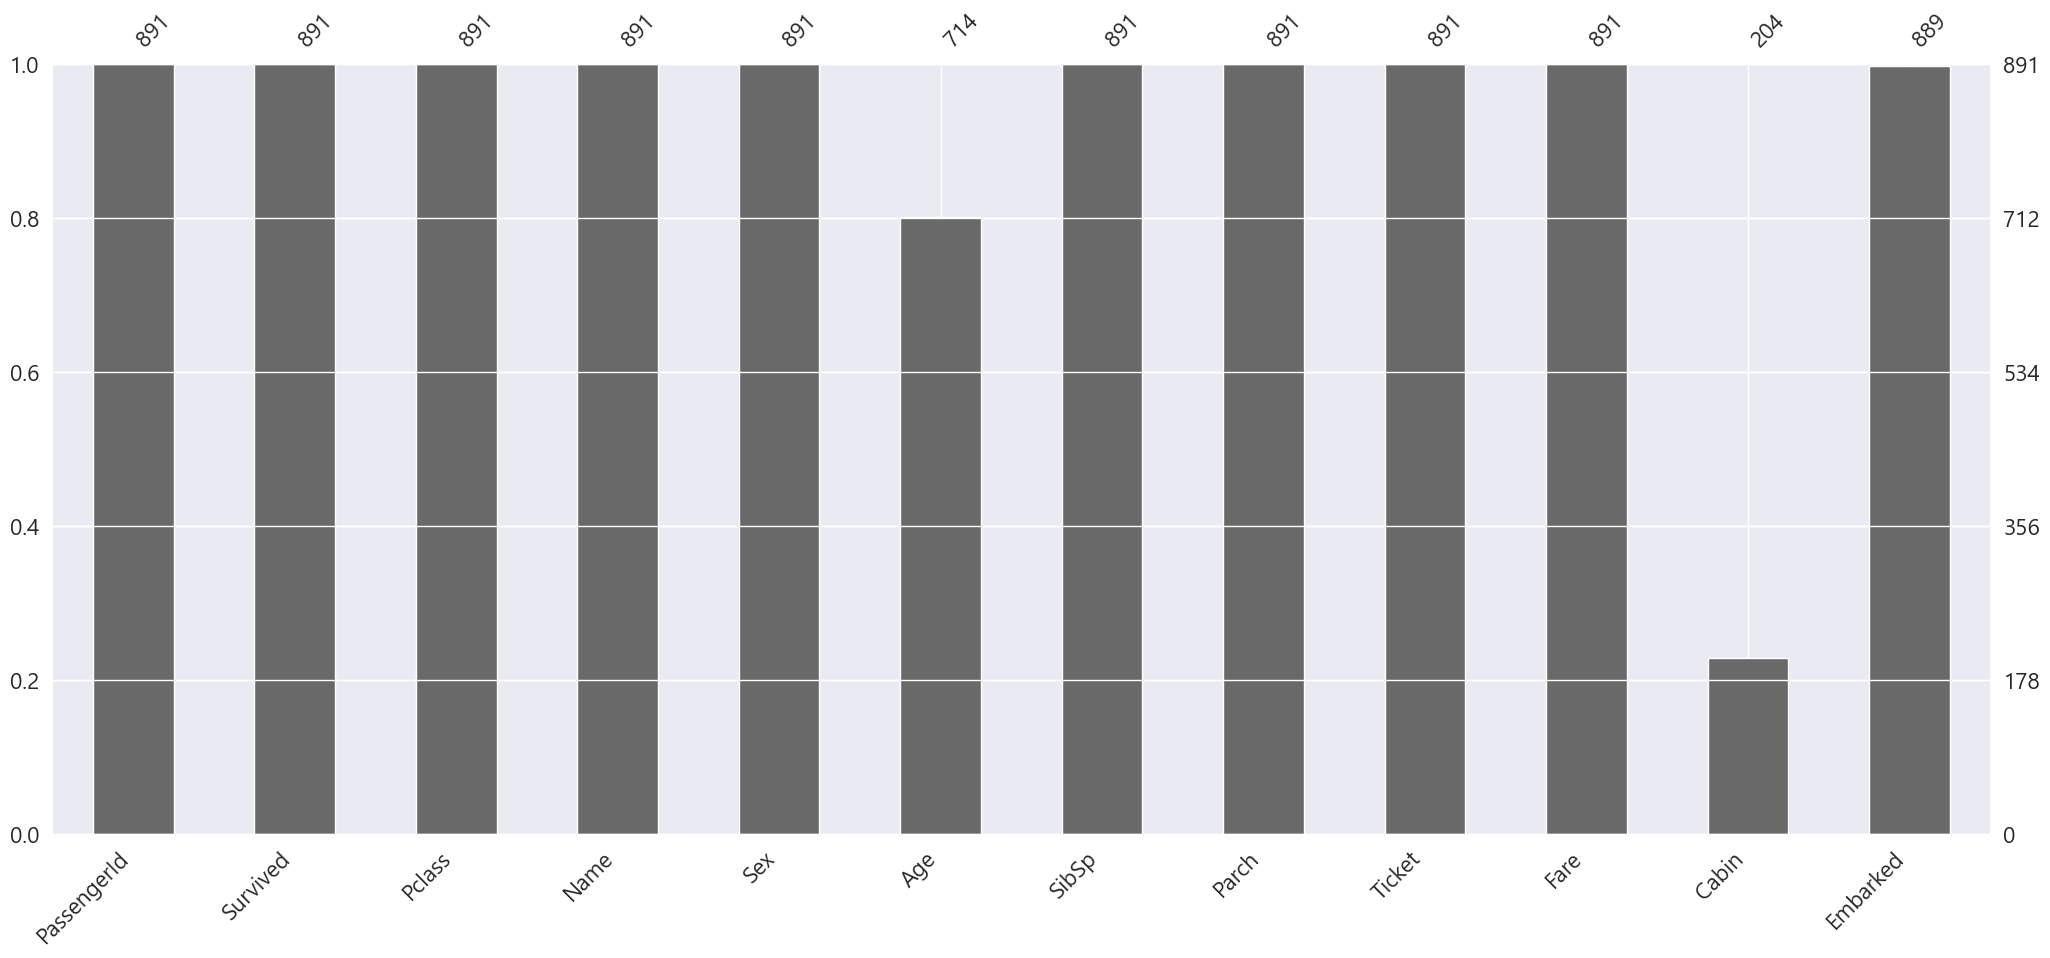

In [5]:
# 각 컬럼별 결측치 현황을 막대 그래프 형태로 확인해본다.
# 결측치를 제외한 데이터 개수
missingno.bar(train_df)
plt.show()

<Axes: >

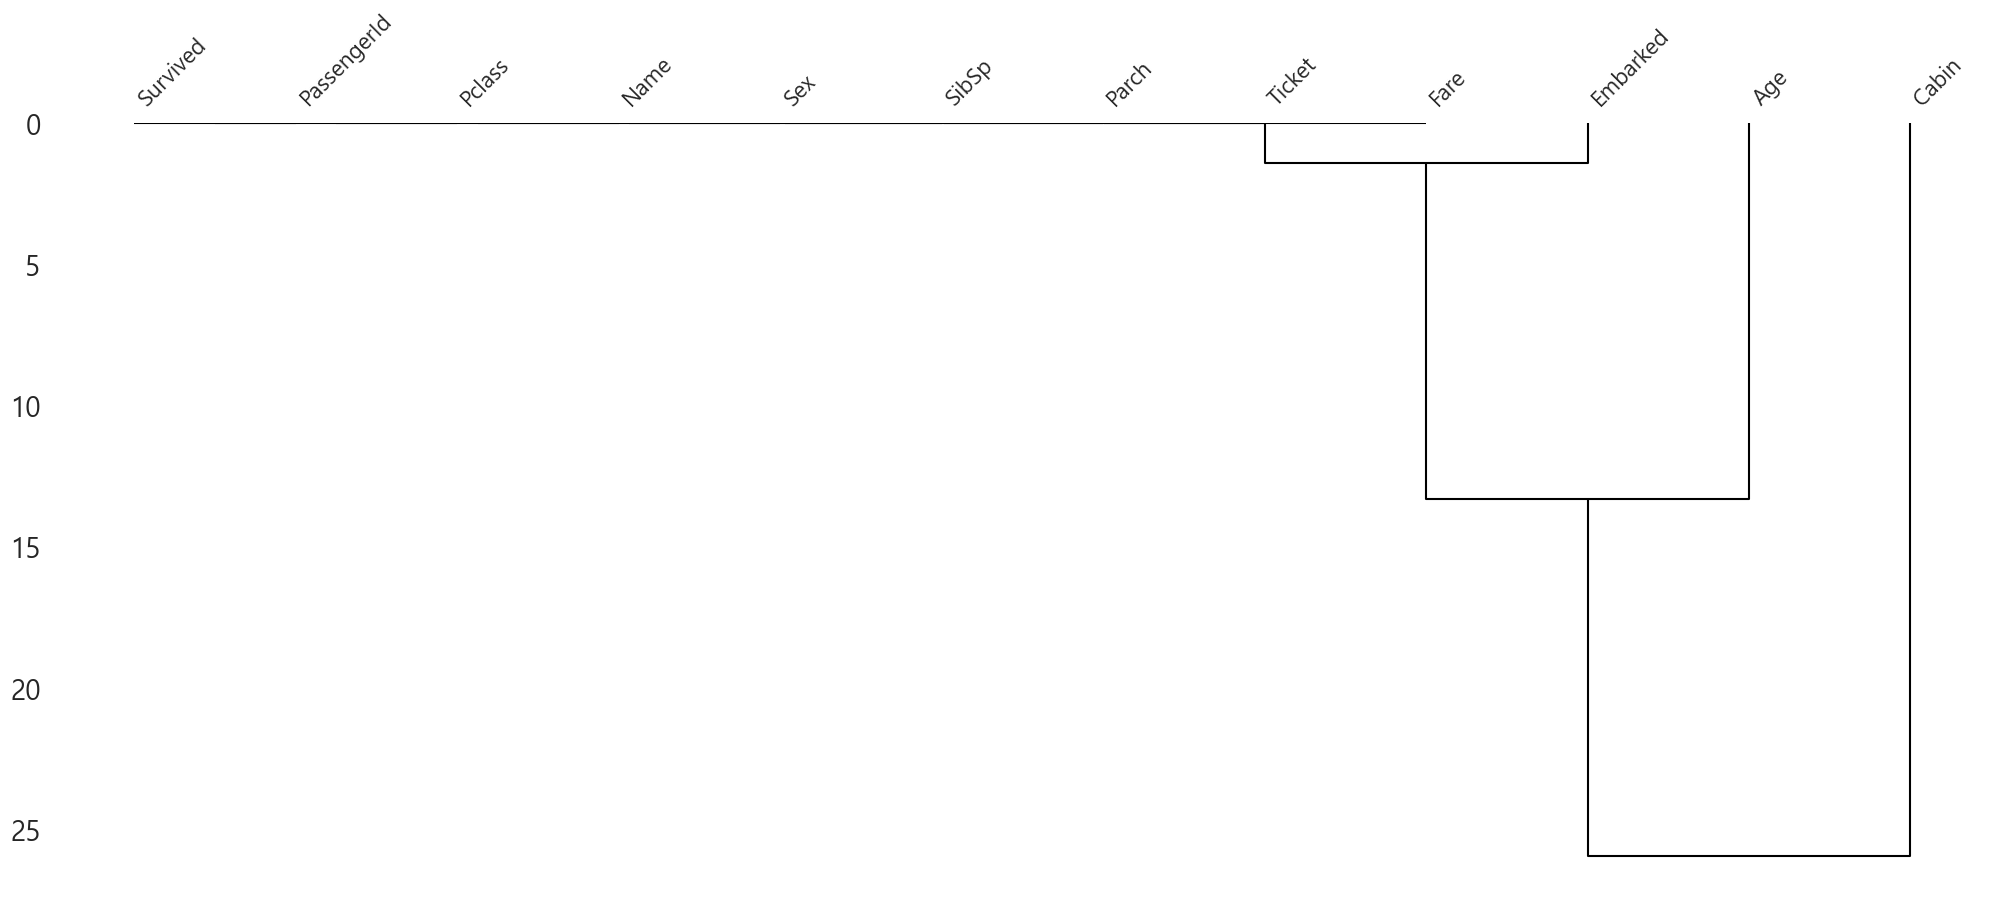

In [6]:
missingno.dendrogram(train_df)

<Axes: >

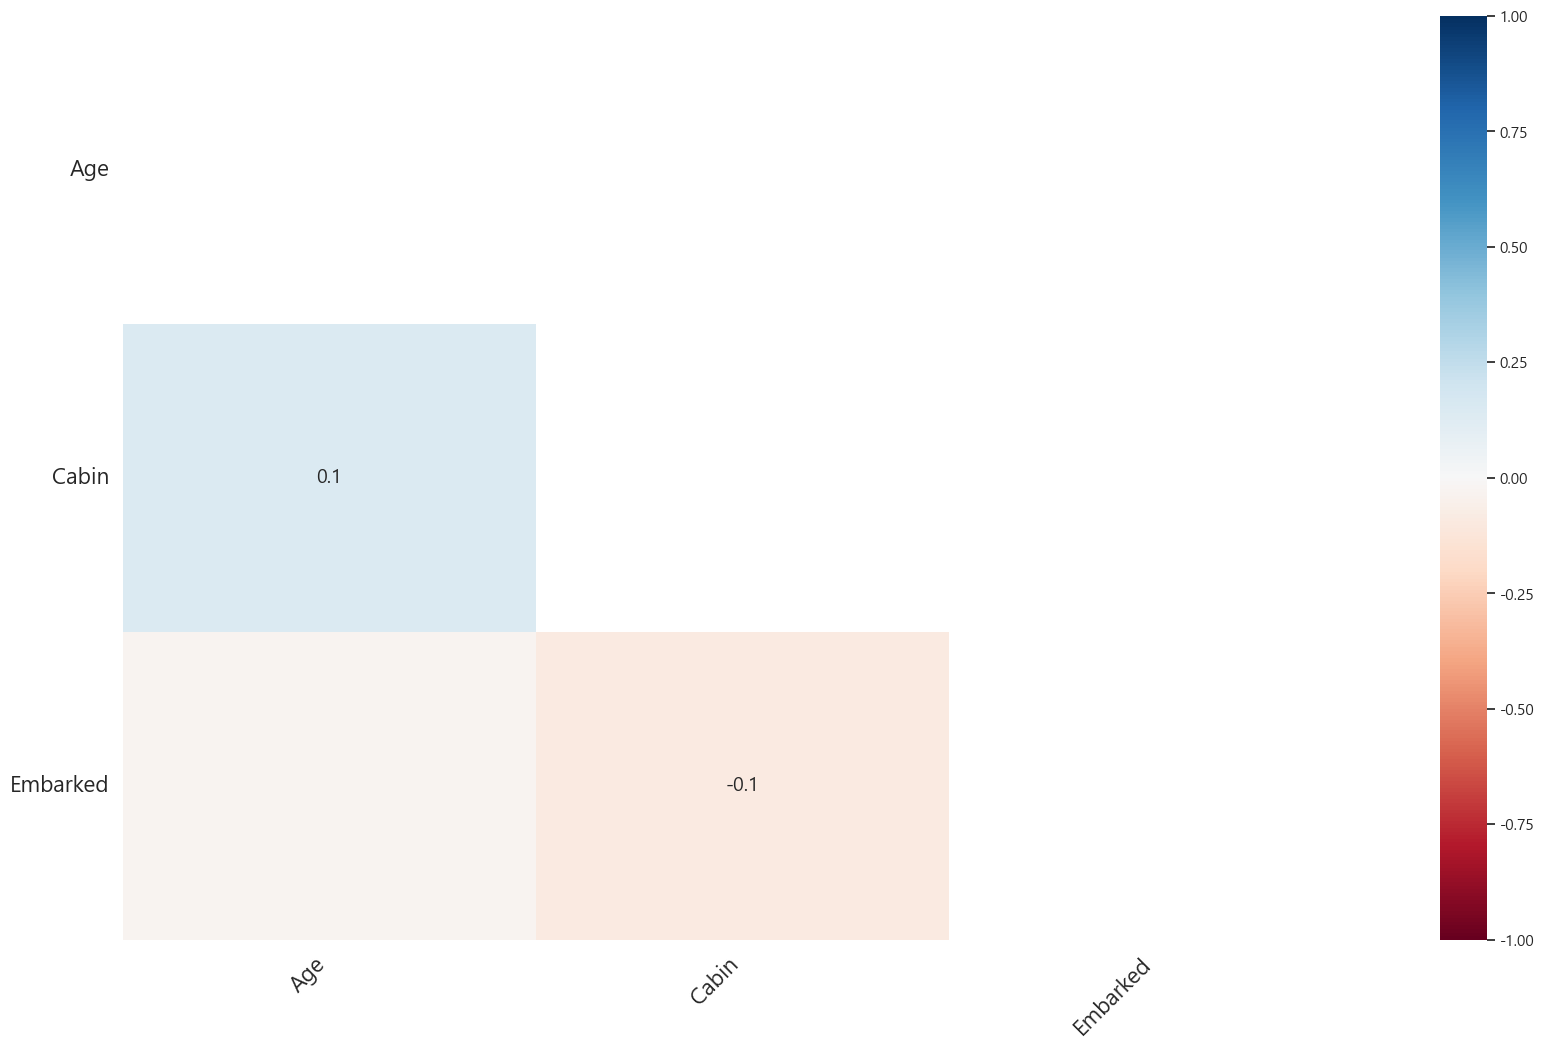

In [7]:
# 양의 상관 관계 : 하나의 변수에서 값이 누락될 때 다른 변수에서도 값이 누락될 가능성이 높은 것
# 음의 상관 관계 : 하나의 변수에서 값이 누락될 때 다른 변수에서는 값이 누락될 가능성이 낮은 것
# 0에 가까울 : 두 변수 값의 결측치값 유무가 서로 독립적이다.
missingno.heatmap(train_df)

<Axes: >

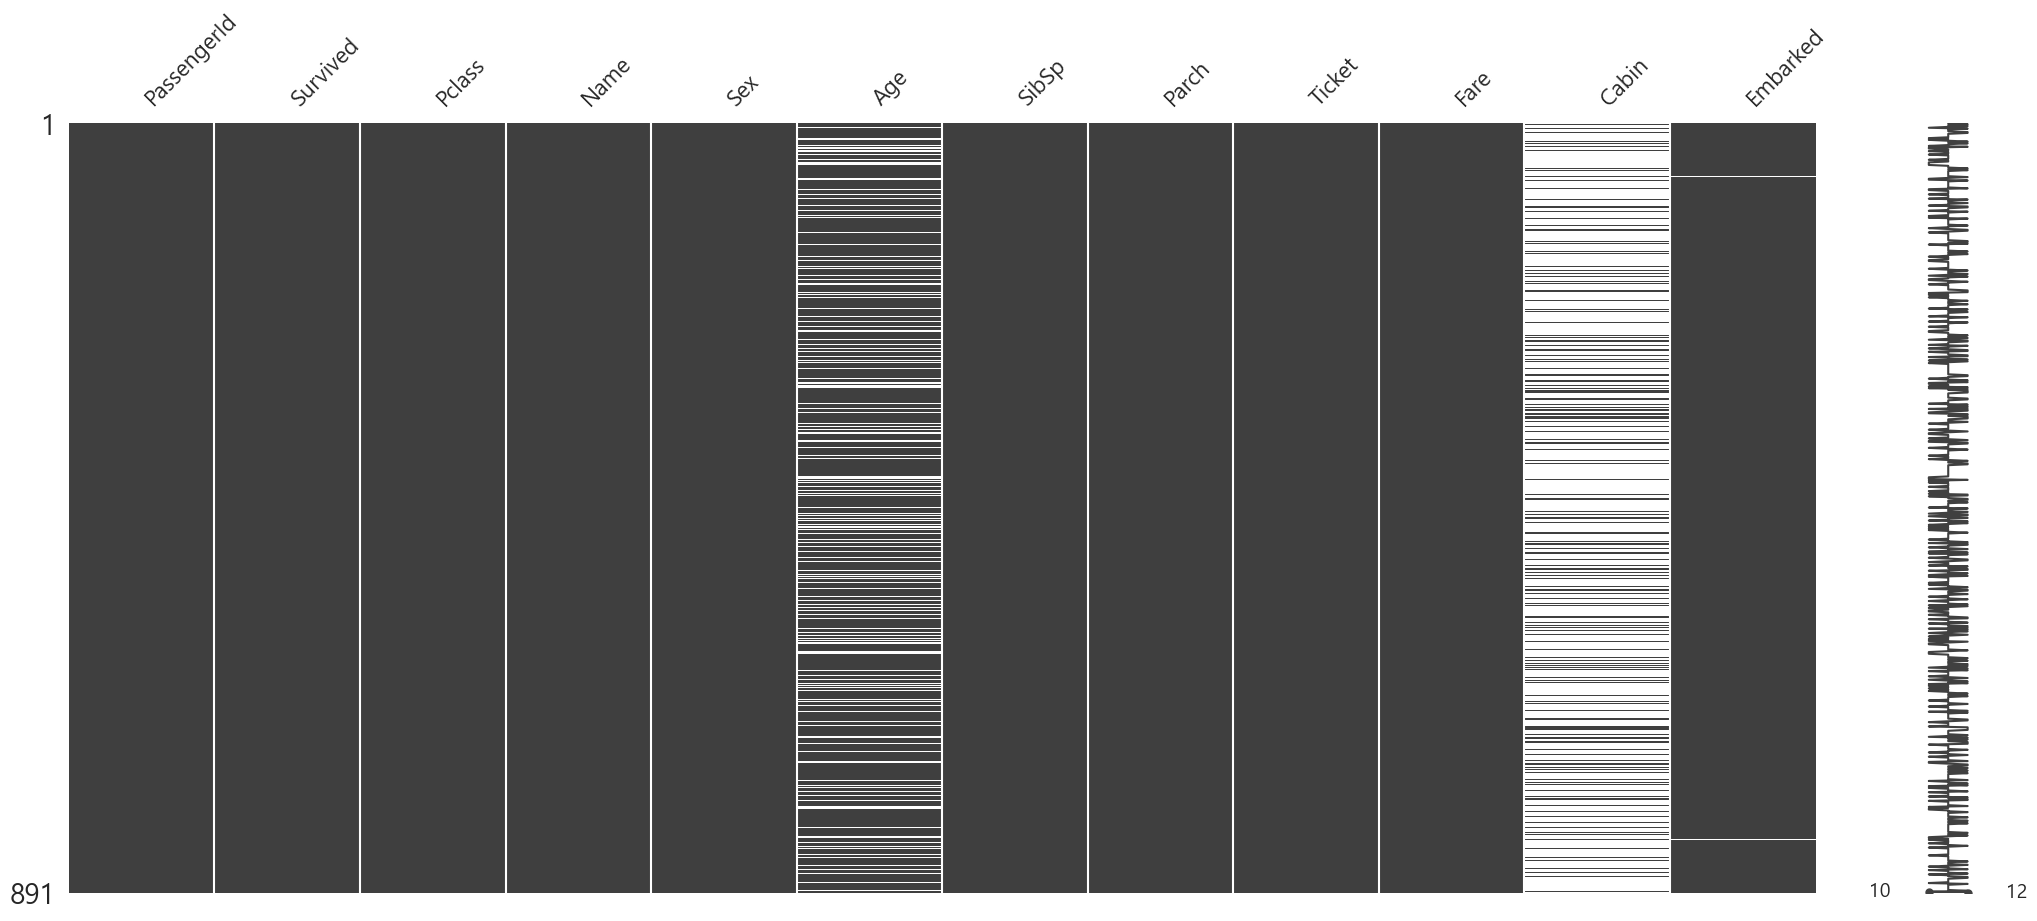

In [8]:
# 각 행별로 결측치가 어느 행에 있는지를 시각화한다.
missingno.matrix(train_df)

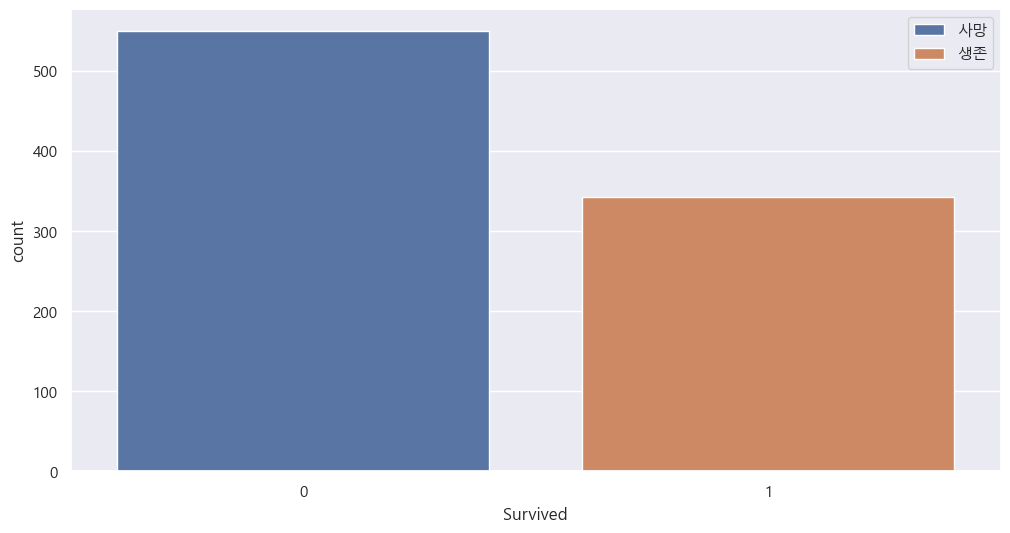

In [9]:
# 승객들의 생존 여부 비교
sns.countplot(data=train_df, x='Survived', hue='Survived')
plt.legend(labels=['사망', '생존'])
plt.show()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

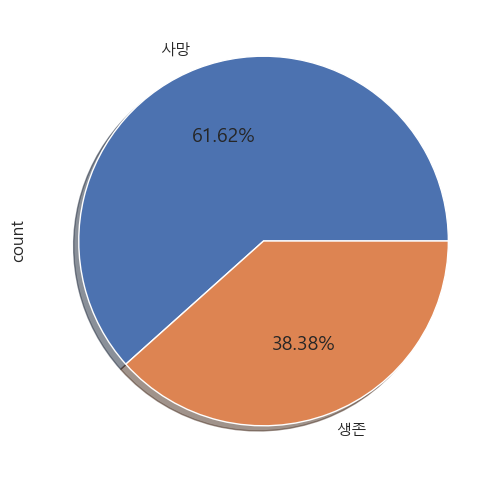

In [10]:
# 생존 비율
display(train_df['Survived'].value_counts())

train_df['Survived'].value_counts().plot.pie(shadow=True, autopct='%.2f%%',
                                            labels=['사망', '생존'])

사망자 수가 생존자 수보다 많다 (549 : 342)

PassengerId 컬럼은 1부터 1씩 증가 시킨 값으로 아무 의미가 없다.

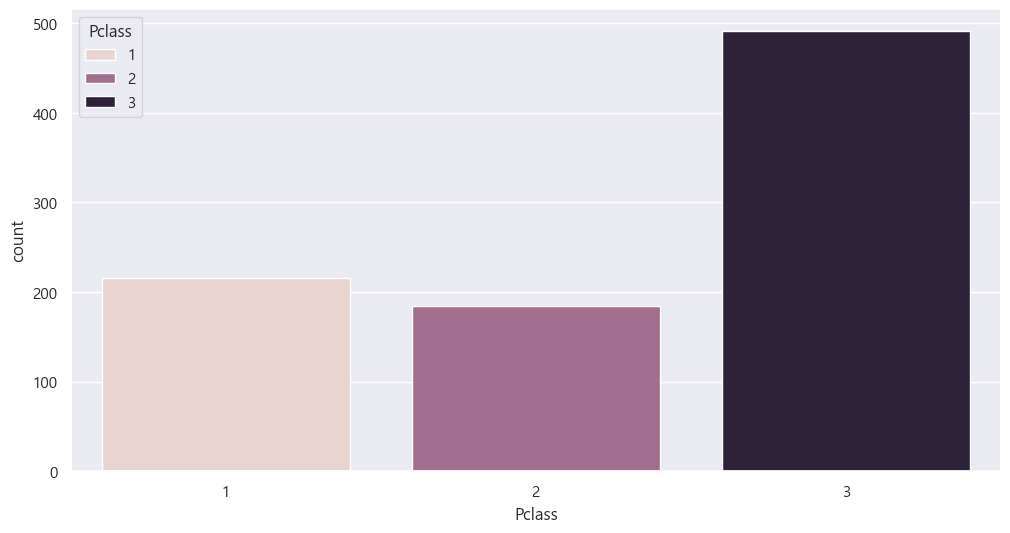

In [11]:
# Pclass 분포 확인
sns.countplot(data=train_df, x='Pclass', hue='Pclass')
plt.show()

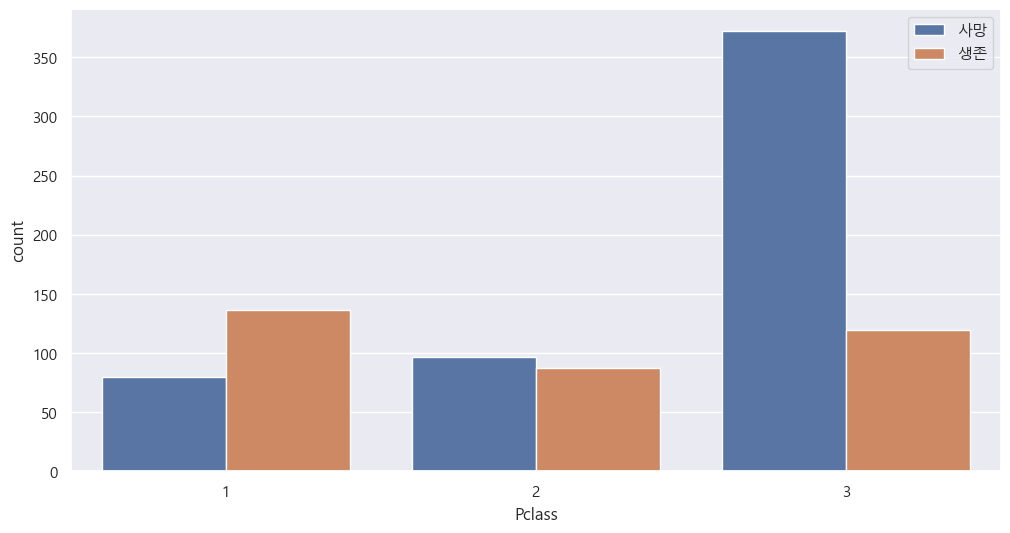

In [12]:
# Pclass와 사망 생존간의 관계
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.legend(labels=['사망', '생존'])
plt.show()

- 3등석의 수가 제일 많다
- 1등석은 생존률이 높고 3등석은 사망율이 높다

In [13]:
# 각 이름에서 LastName만 추출한다
def get_last_name(name) :
    a1 = name.split(',')
    return a1[0].strip()

last_name = train_df['Name'].apply(get_last_name)
last_name

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [14]:
# LastName 과 사망생존을 합친다.
temp_df = last_name.to_frame()
temp_df['Survived'] = train_df['Survived']
temp_df

,Name,Survived
0,Braund,0
1,Cumings,1
2,Heikkinen,1
3,Futrelle,1
4,Allen,0
...,...,...
886,Montvila,0
887,Graham,1
888,Johnston,0
889,Behr,1


In [15]:
# 도수 분포를 확인한다.
# 사망자 도수 분포
a1 = temp_df.query('Survived == 0')['Name'].value_counts()
# 생존자 도수 분포
a2 = temp_df.query('Survived == 1')['Name'].value_counts()

display(a1)
display(a2)

Name
Sage         7
Andersson    7
Skoog        6
Goodwin      6
Panula       6
            ..
Mineff       1
Haas         1
Levy         1
Naidenoff    1
Dooley       1
Name: count, Length: 443, dtype: int64

Name
Baclini    4
Carter     4
Harper     3
Asplund    3
Brown      3
          ..
Young      1
Ball       1
Burns      1
Dahl       1
Behr       1
Name: count, Length: 280, dtype: int64

In [16]:
# 사망자 중 last name 도수가 1보다 큰 것들만 확인해본다.
display(len(a1[a1 > 1]))
# 생존자 중 last name 도수가 1보다 큰 것만들 확인해본다.
display(len(a2[a2 > 1]))

60

52

In [17]:
# last_name 전체의 데이터 가지수를 확인한다.
len(temp_df['Name'].unique())

667

LastName에서 60가지가 2이상 사망하였고 52가지가 2이상 생존하였다.

In [18]:
# 이름에 중간에 있는 타이틀을 추출한다.
def get_title(name) :
    a1 = name.split(',')
    return a1[1].split('.')[0].strip()

title = train_df['Name'].apply(get_title)
title

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [19]:
# title에 Survived를 합쳐서 하나의 데이터 프레임으로 생성한다.
temp_df = title.to_frame()
temp_df['Survived'] = train_df['Survived']
temp_df

,Name,Survived
0,Mr,0
1,Mrs,1
2,Miss,1
3,Mrs,1
4,Mr,0
...,...,...
886,Rev,0
887,Miss,1
888,Miss,0
889,Mr,1


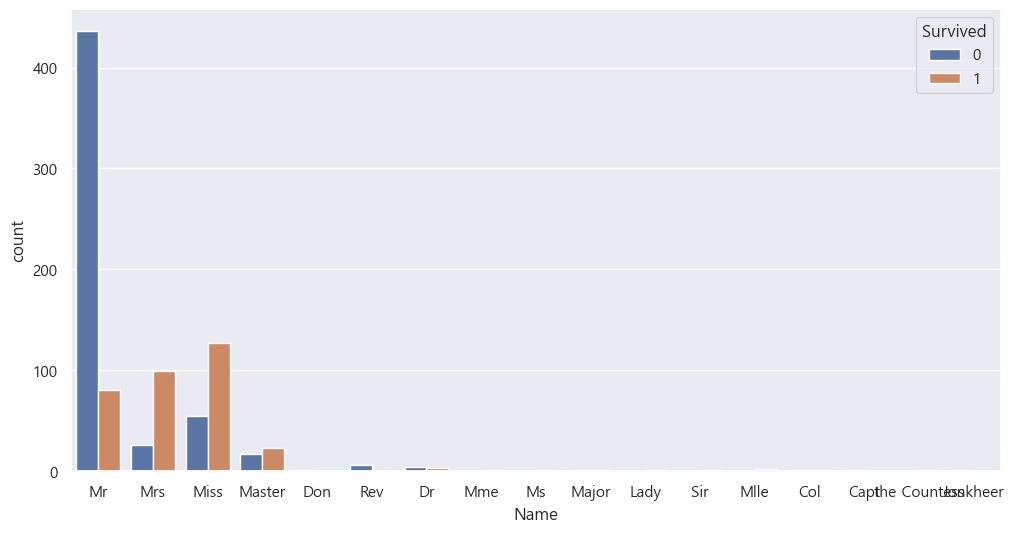

In [20]:
# 타이틀과 생존 여부간의 관계를 살펴본다.
sns.countplot(data=temp_df, x='Name', hue='Survived')
plt.show()

- Title이 Mr인 사람은 사망확률이 매우 높다.
- title이 Mrs, Miss인 사람은 생존확률이 매우 높다.
- title Master인 사람은 생존확률이 약간 높다.
- 나머지들은 표본이 매우 적어 상관관계를 분석하기가 어렵다.

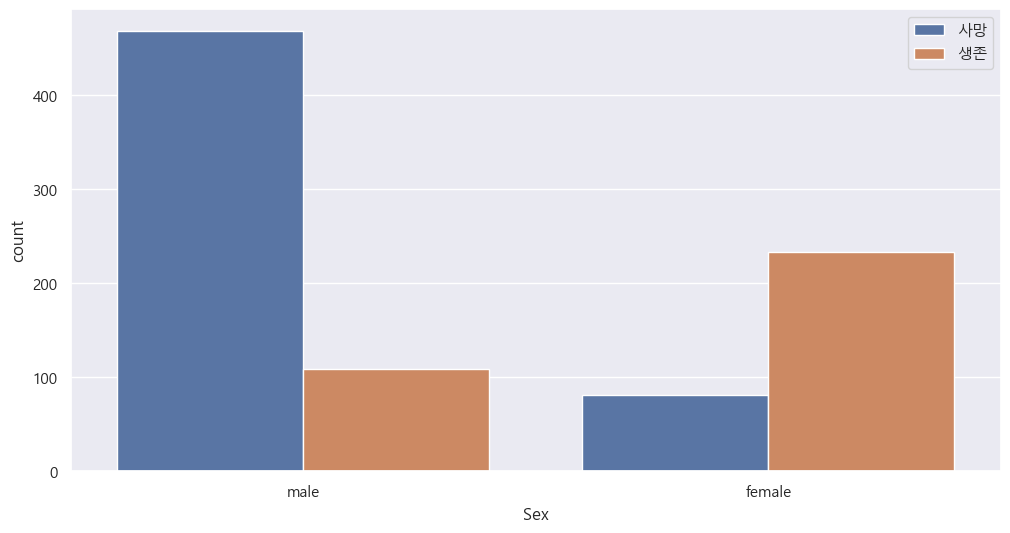

In [21]:
# Sex와 Survived와의 관계를 확인한다.
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.legend(labels=['사망', '생존'])
plt.show()

- 남자인 경우 사망률이 매우 높고 여자일 경우 생존률이 매우 높다.

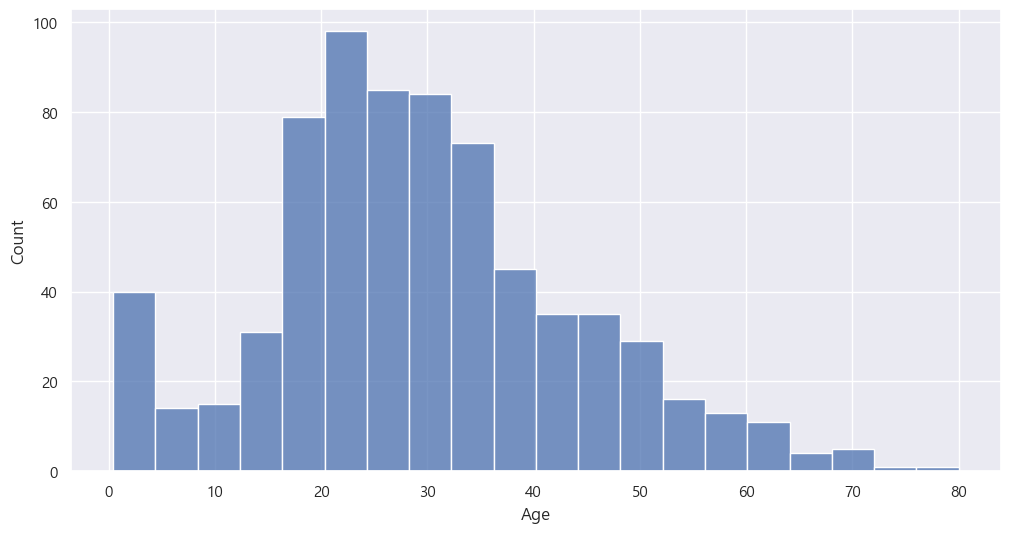

In [22]:
# Age의 분포를 확인한다.
sns.histplot(data=train_df, x='Age')
plt.show()

- 20대에서 30대인 사람이 가장 많다.

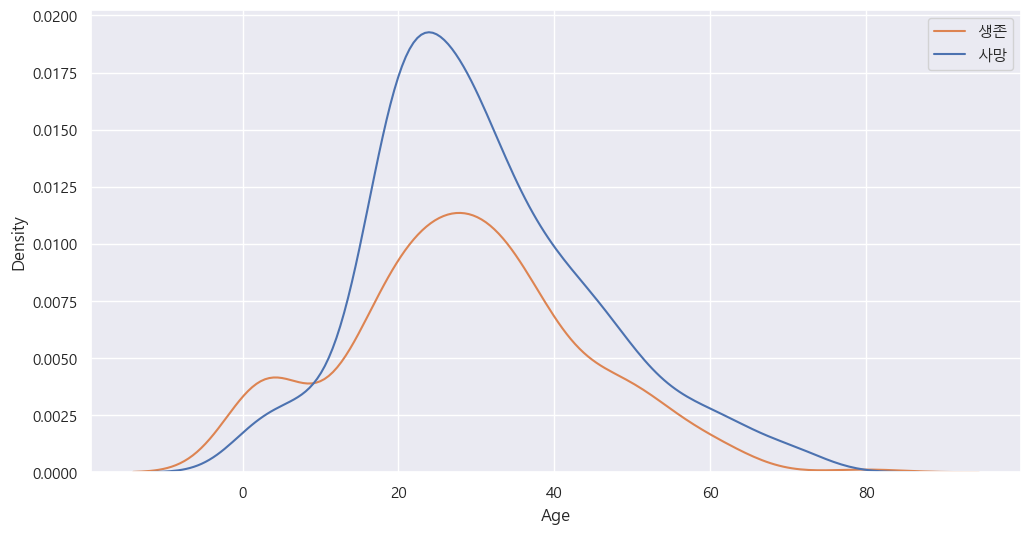

In [23]:
# Age와 사망 생존간의 관계를 본다.
sns.kdeplot(data=train_df, x='Age', hue='Survived')
plt.legend(labels=['생존', '사망'])
plt.show()

- 유아 또는 어린이들은 생존률이 높고 그 외에는 사망률이 높다.

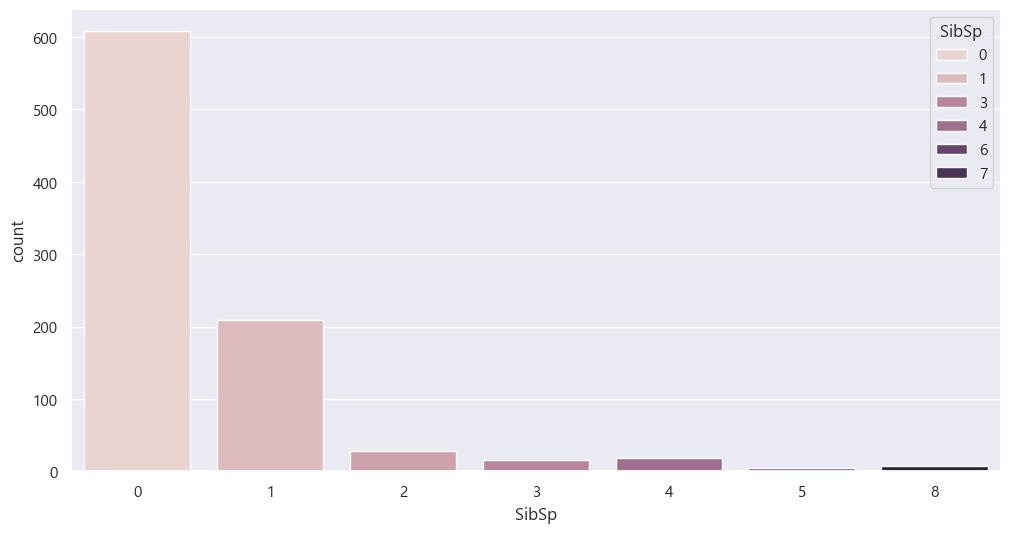

In [24]:
# SibSp의 분포를 확인한다.
sns.countplot(data=train_df, x='SibSp', hue='SibSp')
plt.show()

- 동승한 형제 자매가 없는 사람들이 제일 많다

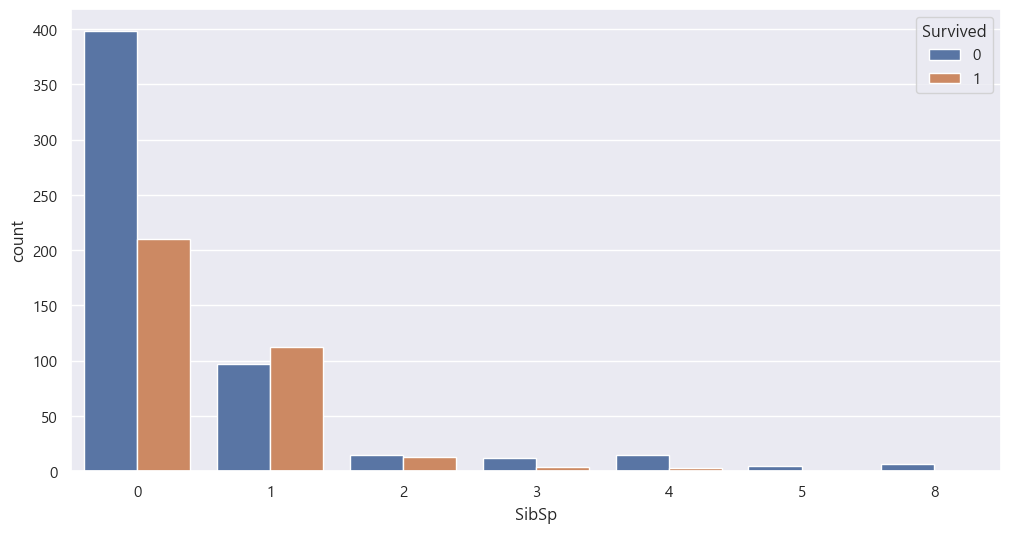

In [25]:
# SibSp와 생존 여부와의 관계를 확인한다.
sns.countplot(data=train_df, x='SibSp', hue='Survived')
plt.show()

- 동승한 형제 자매 수가 1명인 경우 생존확률이 높다
- 동승한 형제 자매 수가 2명인 경우 비슷하다
- 동승한 형제 자매 수가 그 외인 경우에는 사망확률이 높다.

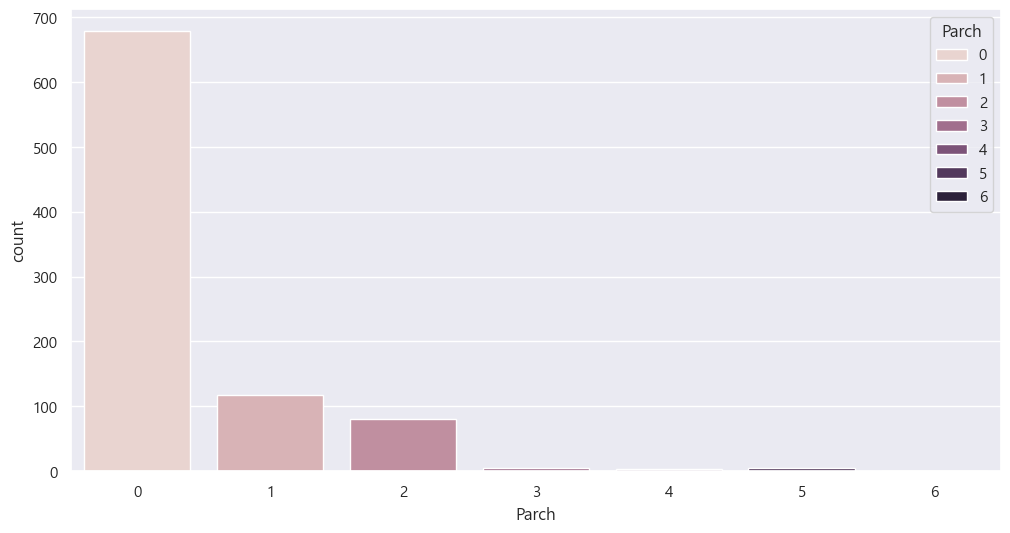

In [27]:
# Parch의 분포를 확인한다.
sns.countplot(data=train_df, x='Parch', hue='Parch')
plt.show()

- 동승한 부모 자식이 없는 사람들이 가장 많이 있다

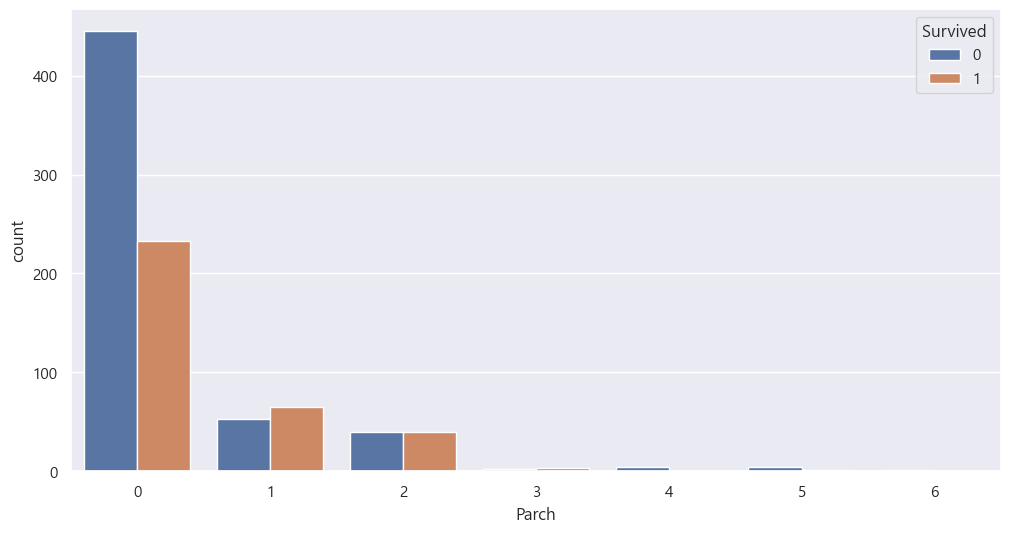

In [28]:
# Parch와 Survived간의 관계를 확인한다.
sns.countplot(data=train_df, x='Parch', hue='Survived')
plt.show()

- 동승한 부모 자식 수가 1명인 경우와 3명인 경우 생존확률이 높다
- 동승한 부모 자식 수가 2명인 경우 비슷하다
- 동승한 부모 자식 수가 그 외인 경우에는 사망확률이 높다.

In [30]:
# 티켓 번호에 대한 도수 분포를 확인한다.
train_df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [33]:
# 티켓 번호 같은 사람이 2명 이상인 사람들만 살펴본다.
a1 = train_df['Ticket'].value_counts()
a1[a1 > 1]

Ticket
347082             7
CA. 2343           7
1601               7
3101295            6
CA 2144            6
                  ..
248738             2
12749              2
19996              2
S.C./PARIS 2079    2
349237             2
Name: count, Length: 134, dtype: int64

- 앞서 살펴봤던 title과 성향이 유사해 보인다.
- 머신러닝을 위한 데이터 분석을 수행할 때 Title과 함께 같이 확인해보도록 하겠다.

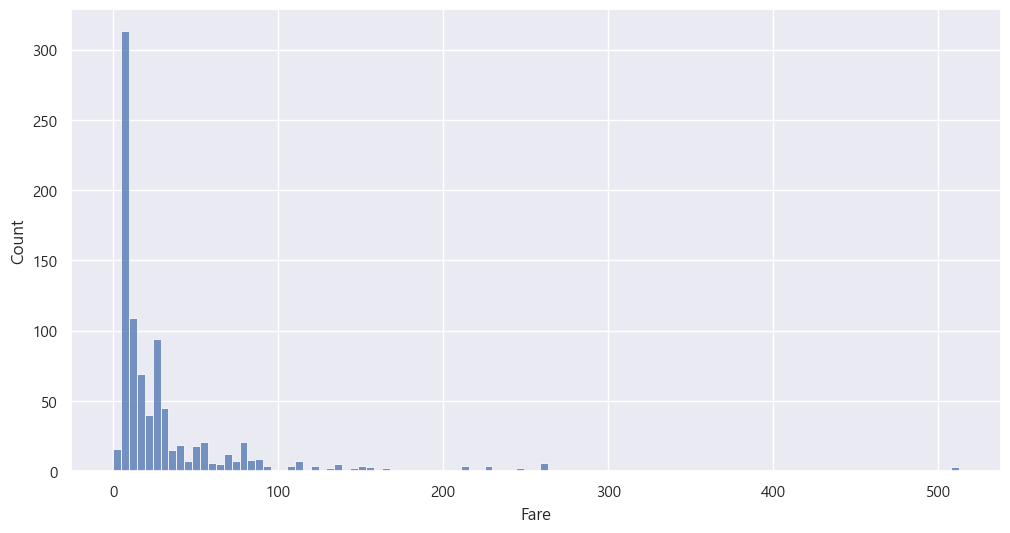

In [34]:
# Fare 분포를 확인한다.
sns.histplot(data=train_df, x='Fare')
plt.show()

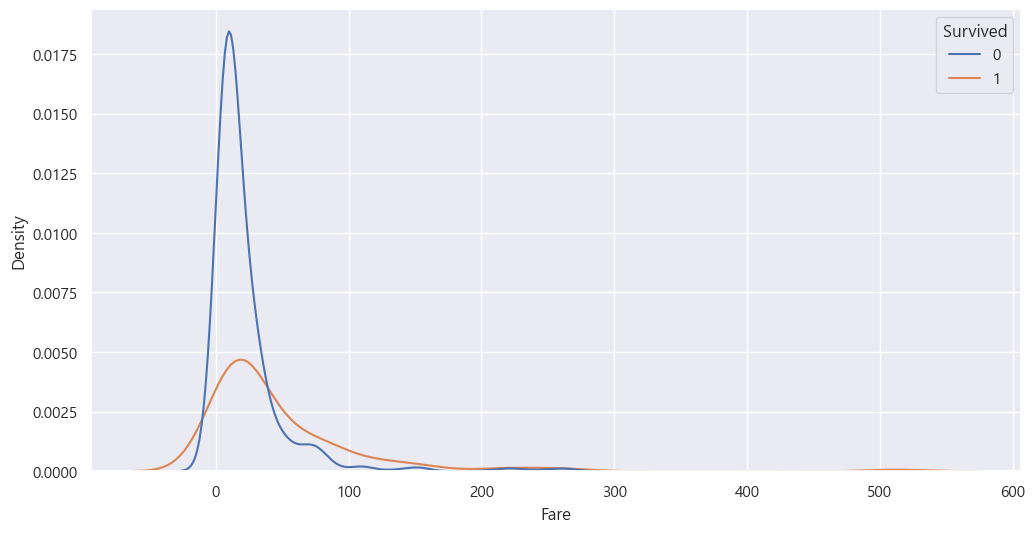

In [35]:
# Fare와 사망 생존과 관계를 살펴본다.
sns.kdeplot(data=train_df, x='Fare', hue='Survived')
plt.show()

- 요금이 낮은쪽이 많이 분포한다.
- 요금이 낮을 수록 사망 확률이 급격히 올라간다.
- 요금이 높을 수록 생존 확률이 올라간다.

In [37]:
# Cabin
train_df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [38]:
# 첫글자는 객실 구역을 의미 하기 때문에 객실 구역을 떼서 살펴본다.
a1 = train_df['Cabin'].str[0]
a1

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

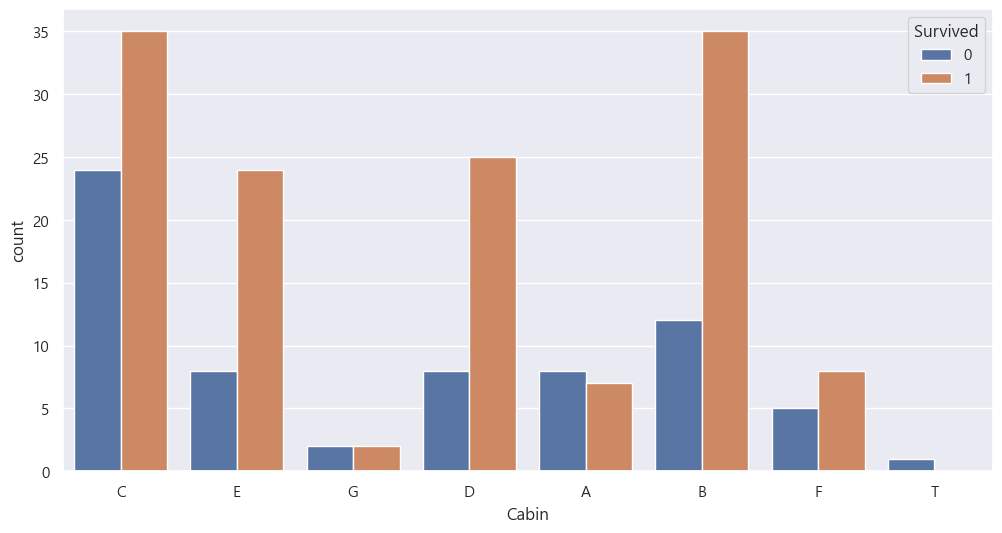

In [43]:
# 객실 구역과 생존 여부와의 관계를 살펴본다.
temp_df = a1.to_frame()
temp_df['Survived'] = train_df['Survived']

sns.countplot(data=temp_df, x='Cabin', hue='Survived')
plt.show()

- 현재 Cabin은 결측치 비율이 너무 높다.
- 이럴 경우 해당 컬럼을 삭제하는 것이 좋다.
- 이 컬럼은 머신러닝을 위한 전처리를 할 때 데이터를 채우고 다시 살펴보겠다.

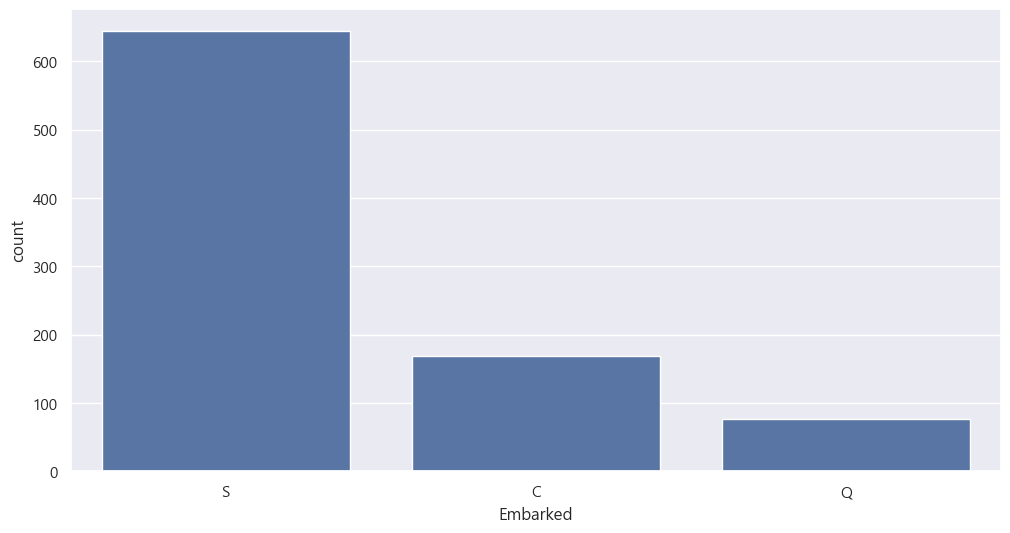

In [44]:
# Embarked 분포를 살펴본다.
sns.countplot(data=train_df, x='Embarked')
plt.show()

- S 에서 탑승한 승객이 가장 많고 C, Q 순서대로 탑승한 승객이 많다.

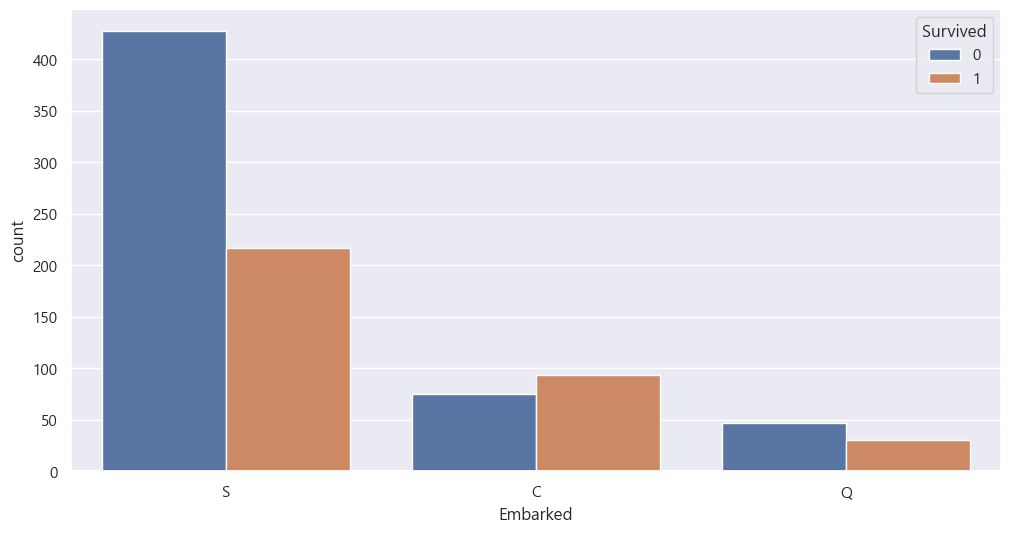

In [45]:
# Embarked와 사망 생존간의 관계를 살펴본다.
sns.countplot(data=train_df, x='Embarked', hue='Survived')
plt.show()

- S에서 탑승한 승객의 경우 사망율이 매우 높다.
- C에서 탑승한 승객의 경우 생존율이 조금 높다.
- Q에서 탑승한 승객의 경우 사망율이 조금 높다.

### 최종 정리
- 사망자 수가 생존자 수보다 많다 (549 : 342)
- PassengerId 컬럼은 1부터 1씩 증가 시킨 값으로 아무 의미가 없다.
- 3등석의 수가 제일 많다
- 1등석은 생존률이 높고 3등석은 사망율이 높다
- LastName에서 60가지가 2이상 사망하였고 52가지가 2이상 생존하였다.
- Title이 Mr인 사람은 사망확률이 매우 높다.
- title이 Mrs, Miss인 사람은 생존확률이 매우 높다.
- title Master인 사람은 생존확률이 약간 높다.
- 나머지들은 표본이 매우 적어 상관관계를 분석하기가 어렵다.
- 남자인 경우 사망률이 매우 높고 여자일 경우 생존률이 매우 높다.
- 20대에서 30대인 사람이 가장 많다.
- 유아 또는 어린이들은 생존률이 높고 그 외에는 사망률이 높다.
- 동승한 형제 자매가 없는 사람들이 제일 많다
- 동승한 형제 자매 수가 1명인 경우 생존확률이 높다
- 동승한 형제 자매 수가 2명인 경우 비슷하다
- 동승한 형제 자매 수가 그 외인 경우에는 사망확률이 높다.
- 동승한 부모 자식이 없는 사람들이 가장 많이 있다
- 동승한 부모 자식 수가 1명인 경우와 3명인 경우 생존확률이 높다
- 동승한 부모 자식 수가 2명인 경우 비슷하다
- 동승한 부모 자식 수가 그 외인 경우에는 사망확률이 높다.
- 앞서 살펴봤던 title과 성향이 유사해 보인다.
- 머신러닝을 위한 데이터 분석을 수행할 때 Title과 함께 같이 확인해보도록 하겠다.
- 요금이 낮은쪽이 많이 분포한다.
- 요금이 낮을 수록 사망 확률이 급격히 올라간다.
- 요금이 높을 수록 생존 확률이 올라간다.
- 현재 Cabin은 결측치 비율이 너무 높다.
- 이럴 경우 해당 컬럼을 삭제하는 것이 좋다.
- 이 컬럼은 머신러닝을 위한 전처리를 할 때 데이터를 채우고 다시 살펴보겠다.
- S 에서 탑승한 승객이 가장 많고 C, Q 순서대로 탑승한 승객이 많다.
- S에서 탑승한 승객의 경우 사망율이 매우 높다.
- C에서 탑승한 승객의 경우 생존율이 조금 높다.
- Q에서 탑승한 승객의 경우 사망율이 조금 높다.
